# MNIST Digit Classification 

## Packeges

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

2023-12-06 17:58:10.997374: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-06 17:58:11.063987: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-06 17:58:11.469707: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/lib64:
2023-12-06 17:58:11.469778: W tensorflow/compiler/xla/stream_executor/

In [2]:
# GPU Utilization
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2000)]) # 2000 MB=2GB
    except RuntimeError as e:
        print(e)

2023-12-06 17:58:12.185831: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-06 17:58:12.194224: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-06 17:58:12.194526: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


## Load Dataset

In [3]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [8]:
X_train[0].ptp()

255

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Validation dataset

In [10]:
X_valid = X_train[:5000]
y_valid = y_train[:5000]

In [11]:
X_valid.shape, y_valid.shape

((5000, 28, 28), (5000,))

## Normelization

In [12]:
X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255

## Display the images

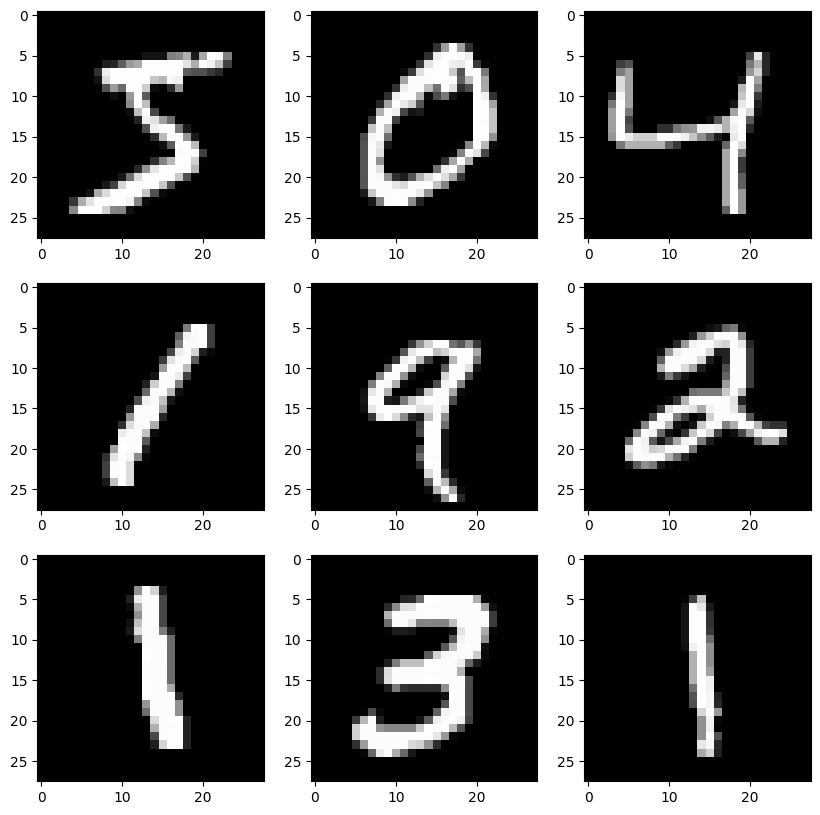

In [13]:
fig, aXes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
a = 0

for i in range(3):
    for j in range(3):        
        aXes[i, j].imshow(X_train[a], cmap=plt.get_cmap('gray'))
        a = a + 1

In [14]:
y_train[0]

5

In [15]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

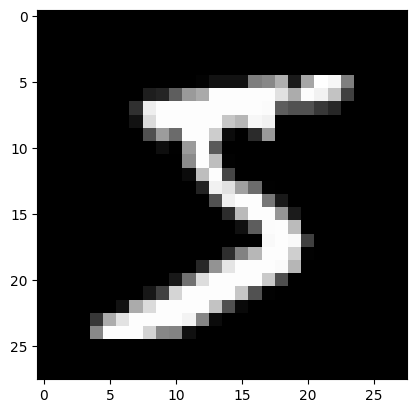

In [16]:
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))

## Model prepration

In [17]:
# CNN
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


2023-12-06 17:58:42.005353: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-06 17:58:42.006712: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-06 17:58:42.007673: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-06 17:58:42.008499: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at

In [18]:
# NN
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28,28]))
# model.add(keras.layers.Dense(300, activation='relu'))
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 300)               4

In [20]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# sparse_categorical_crossentropy

## Training

In [21]:
epochs = 10
history = model.fit(X_train,y_train, validation_data=(X_valid,y_valid), batch_size=32, epochs=epochs )

Epoch 1/10


2023-12-06 17:59:03.719062: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8101
2023-12-06 17:59:04.419171: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-12-06 17:59:04.420200: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f49ee26b6c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-06 17:59:04.420215: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2023-12-06 17:59:04.450782: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 5s 2ms/step - loss: 0.4756 - accuracy: 0.8629 - val_loss: 0.1425 - val_accuracy: 0.9566
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1290 - accuracy: 0.9614 - val_loss: 0.0932 - val_accuracy: 0.9712
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0891 - accuracy: 0.9725 - val_loss: 0.0667 - val_accuracy: 0.9802
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0707 - accuracy: 0.9781 - val_loss: 0.0518 - val_accuracy: 0.9852
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0596 - accuracy: 0.9817 - val_loss: 0.0491 - val_accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0518 - accuracy: 0.9845 - val_loss: 0.0422 - val_accuracy: 0.9880
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0448 - accuracy: 0.9860 - val_loss: 0.0411 - val_accuracy: 0.9876
Epo

## Evaluation

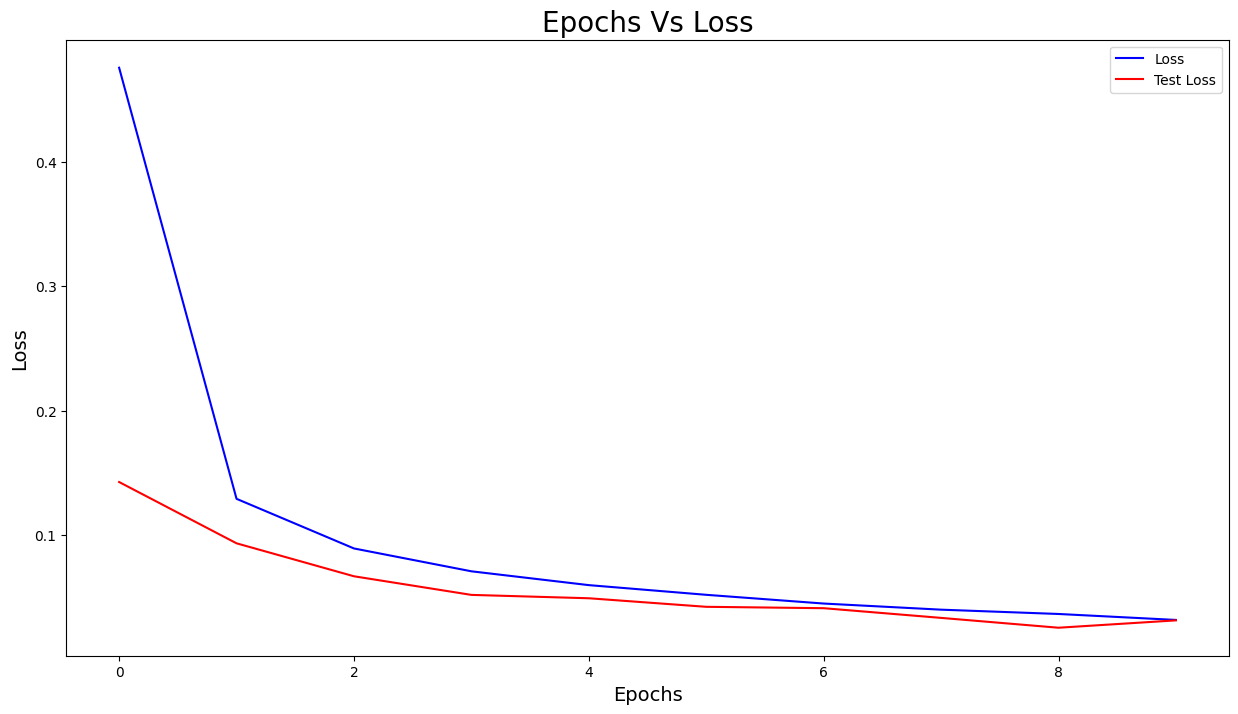

In [22]:
plt.figure(figsize=(15,8))
plt.plot(range(0, epochs), history.history["loss"], color="b", label="Loss")
plt.plot(range(0, epochs), history.history["val_loss"], color="r", label="Test Loss")
plt.title('Epochs Vs Loss', size=20)
plt.xlabel('Epochs', size=14)
plt.ylabel('Loss', size=14)
plt.legend()
plt.show()

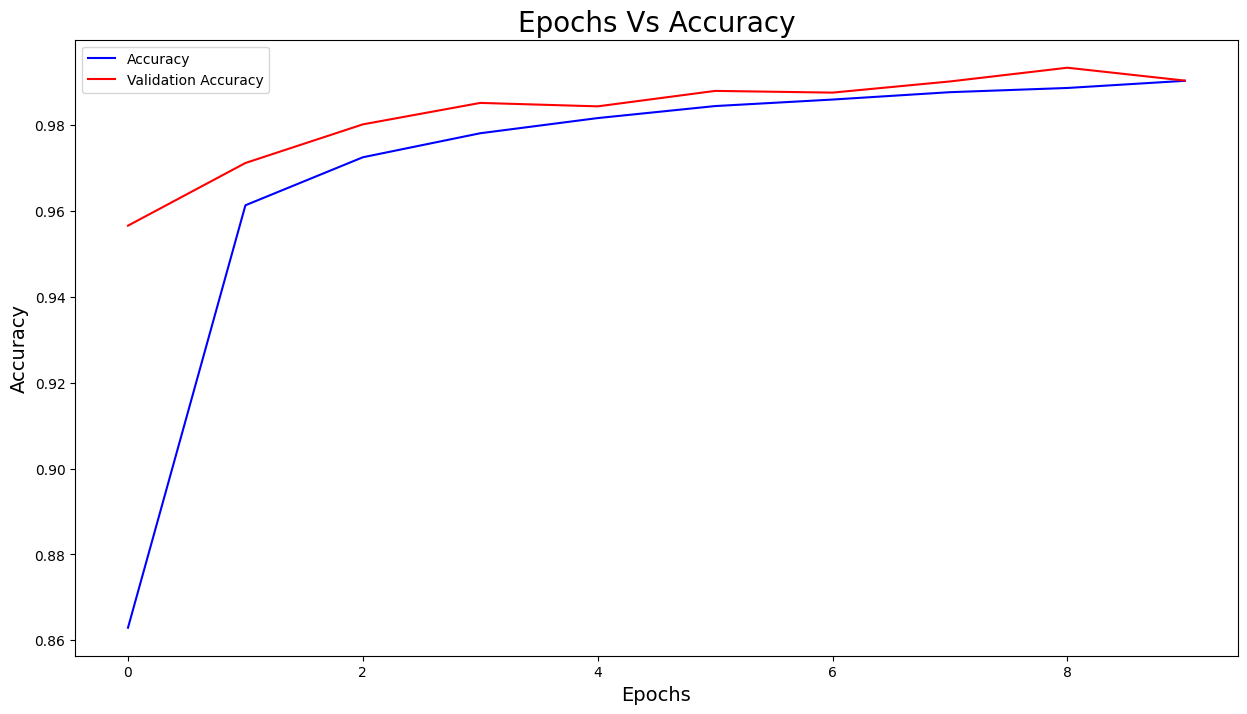

In [23]:
plt.figure(figsize=(15,8))
plt.plot(range(0, epochs), history.history["accuracy"], color="b", label="Accuracy")
plt.plot(range(0, epochs), history.history["val_accuracy"], color="r", label="Validation Accuracy")
plt.title('Epochs Vs Accuracy', size=20)
plt.xlabel('Epochs', size=14)
plt.ylabel('Accuracy', size=14)
plt.legend()
plt.show()

In [24]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 900us/step - loss: 0.0421 - accuracy: 0.9852


[0.0421295128762722, 0.9851999878883362]

In [25]:
y_prob = model.predict(X_test)
y_classes = y_prob.argmax(axis=-1)
y_classes

313/313 [==============================] - 0s 521us/step


array([7, 2, 1, ..., 4, 5, 6])

In [26]:
confusion_matrix = tf.math.confusion_matrix(y_test, y_classes)

In [27]:
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    0,    0,    1,    2,    4,    2,    5,    3],
       [   0, 1121,    1,    1,    0,    0,    2,    1,    8,    1],
       [   1,    2,  992,    5,    1,    0,    0,   13,   17,    1],
       [   0,    0,    1,  997,    0,    5,    0,    2,    4,    1],
       [   0,    0,    0,    0,  975,    0,    1,    2,    0,    4],
       [   1,    0,    0,    3,    0,  885,    1,    1,    1,    0],
       [   2,    2,    0,    1,    2,    7,  941,    0,    3,    0],
       [   0,    0,    2,    1,    0,    0,    0, 1016,    1,    8],
       [   2,    0,    0,    0,    0,    1,    0,    2,  966,    3],
       [   0,    1,    0,    0,    2,    4,    0,    4,    2,  996]],
      dtype=int32)>

In [28]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [29]:
y_classes

array([7, 2, 1, ..., 4, 5, 6])

In [30]:
from sklearn.metrics import precision_score, recall_score

In [31]:
precision_score(y_test, y_classes, average='micro')


0.9852

In [32]:
recall_score(y_test, y_classes, average='micro')

0.9852

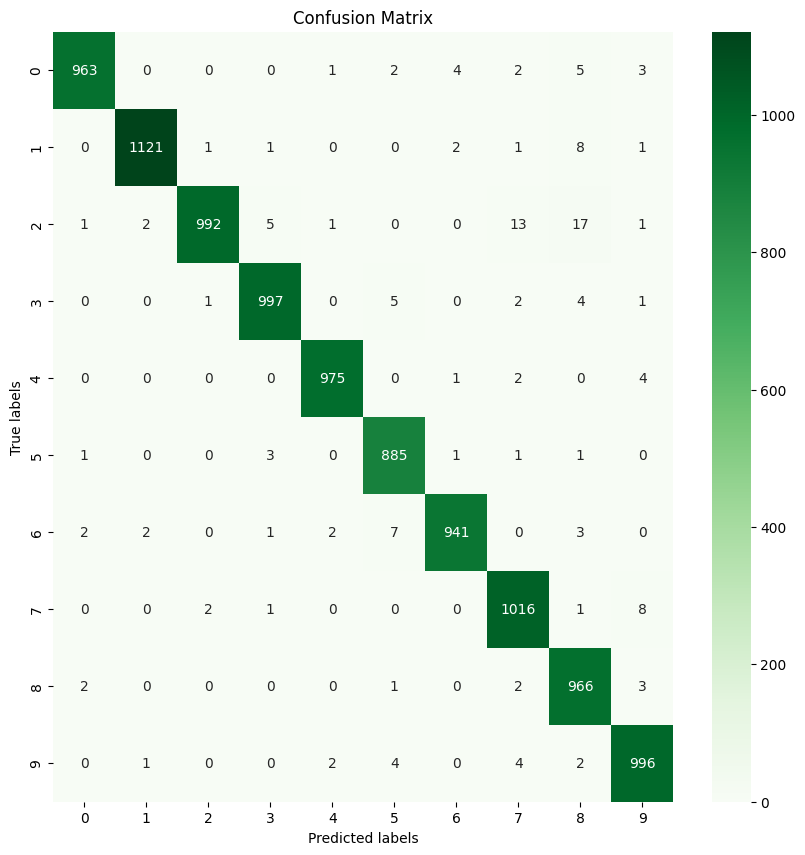

In [33]:
import seaborn as sb   

# ax = plt.figure(figsize=(8, 6))
class_names = ["0","1","2","3","4","5","6","7","8","9"]
fig = sb.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Greens')  

# labels, title and ticks
fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix')
fig.xaxis.set_ticklabels(class_names) 
fig.yaxis.set_ticklabels(class_names)
fig.figure.set_size_inches(10, 10)

## Save model

In [35]:
keras.models.save_model(model, 'mnist_cnn.h5')

##  Inference

### CV2

In [195]:
def preprocess_image(image, input_size = (28, 28)):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(gray, (21, 21), 0)
    # Thresholding
    thresh = cv2.threshold(blurred, 110, 255, cv2.THRESH_BINARY_INV)[1]
    # Resize to the input size expected by your model
    resized_img = cv2.resize(thresh, input_size, interpolation=cv2.INTER_AREA)
    # Normalize pixel values to be in the range [0, 1]
    normalized_img = resized_img.astype("float") / 255.0
    # Add batch dimension
    input_tensor = np.expand_dims(normalized_img, axis=0)
    # input_tensor = normalized_img
    return input_tensor



In [196]:
image = preprocess_image(img)
image.shape

(1, 28, 28)

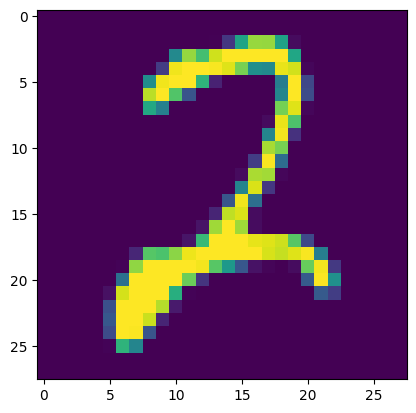

In [198]:
plt.imshow(image[0,:])

In [201]:
model = keras.models.load_model('mnist_nn.h5')

In [202]:
model.predict(image)

1/1 [==============================] - 0s 26ms/step


array([[8.7418933e-08, 3.5225230e-03, 9.9555236e-01, 8.9837617e-04,
        1.4306458e-07, 2.7564442e-06, 5.9303902e-06, 1.1364126e-05,
        6.3934372e-06, 3.7705453e-10]], dtype=float32)

In [179]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [199]:
model = keras.models.load_model('mnist_nn.h5')

In [200]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [181]:
img = cv2.imread('/home/appy1/Downloads/2.jpeg')

In [182]:
# rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (21,21), 0)
thresh = cv2.threshold(blurred, 110, 255, cv2.THRESH_BINARY_INV)[1]

In [183]:
thresh.shape

(225, 225)

In [184]:
thresh = cv2.resize(thresh, (28,28))

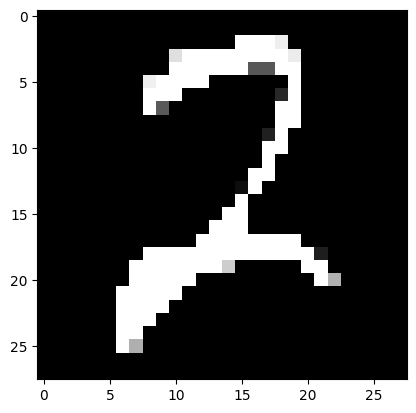

In [185]:
# plt.imshow(thresh)
plt.imshow(thresh, cmap=plt.get_cmap('gray'))

In [186]:
thresh

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 255, 255, 255, 238,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 223, 255, 255,
        255, 255, 255, 255, 255, 255, 236,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,
        255, 255, 255,  87,  87, 255, 255,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 240, 255, 255, 255, 255,
          0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [187]:
thresh= thresh/255

In [188]:
thresh.shape

(28, 28)

In [189]:
thresh

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 1.    

In [190]:
im = np.expand_dims(thresh, -1)[None]
im.shape

(1, 28, 28, 1)

In [191]:
thresh.shape

(28, 28)

In [192]:
cl = model.predict(thresh)

ValueError: in user code:

    File "/mnt/vol_1/mnist/venv/lib/python3.8/site-packages/keras/engine/training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "/mnt/vol_1/mnist/venv/lib/python3.8/site-packages/keras/engine/training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/mnt/vol_1/mnist/venv/lib/python3.8/site-packages/keras/engine/training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "/mnt/vol_1/mnist/venv/lib/python3.8/site-packages/keras/engine/training.py", line 2079, in predict_step
        return self(x, training=False)
    File "/mnt/vol_1/mnist/venv/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/mnt/vol_1/mnist/venv/lib/python3.8/site-packages/keras/engine/input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_1' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 784, but received input with shape (None, 28)
    
    Call arguments received by layer 'sequential_1' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 28), dtype=float32)
      • training=False
      • mask=None


In [173]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]

In [174]:
class_names[np.argmax(cl)]

'2'

### Pillow

In [26]:
from PIL import Image, ImageFilter
import numpy as np
def preprocess_image(image, input_size=(28, 28)):

    # Convert the image to grayscale
    gray = image.convert("L")

    # Apply Gaussian Blur (not directly available in Pillow, we can use filter)
    blurred = gray.filter(ImageFilter.GaussianBlur(radius=2))

    # Thresholding (simple thresholding, you may need to adjust)
    threshold = 80
    binary_image = blurred.point(lambda p: p > threshold and 255)

    # Resize to the input size expected by your model
    resized_img = binary_image.resize(input_size, Image.LANCZOS)

    # Convert to NumPy array and normalize pixel values to be in the range [0, 1]
    normalized_img = np.array(resized_img) / 255.0

    # Add batch dimension
    input_tensor = np.expand_dims(normalized_img, axis=0)

    return input_tensor

In [27]:
img = Image.open('/home/shah/Downloads/71.jpg')

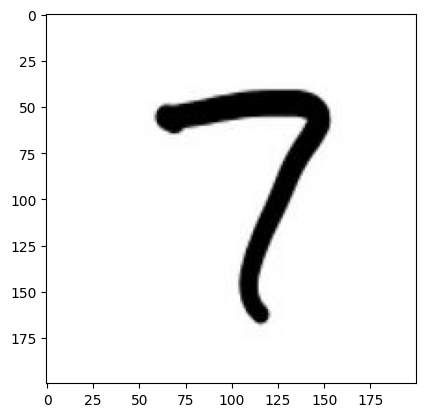

In [28]:
plt.imshow(img)

In [29]:
import matplotlib.pyplot as plt
images = preprocess_image(img)

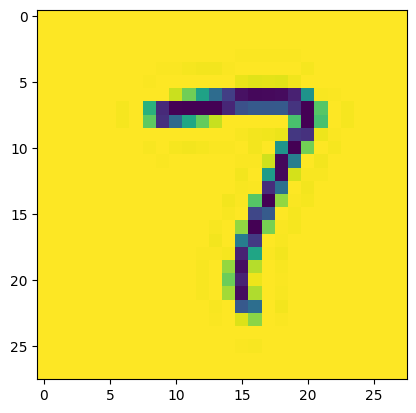

In [30]:
plt.imshow(images[0,:])

## API

In [38]:
from flask import Flask, request, jsonify
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import gc
import os

# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
# GPU Utilization
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2000)]) #2000MB=2GB
    except RuntimeError as e:
        print(e)


app = Flask(__name__)
class_names = ["0","1","2","3","4","5","6","7","8","9"]
input_shape = (28,28)
model = keras.models.load_model('mnist_nn.h5')

def preprocess_image(image, input_size = (28, 28)):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(gray, (21, 21), 0)
    # Thresholding
    thresh = cv2.threshold(blurred, 110, 255, cv2.THRESH_BINARY_INV)[1]
    # Resize to the input size expected by your model
    resized_img = cv2.resize(thresh, input_size, interpolation=cv2.INTER_AREA)
    # Normalize pixel values to be in the range [0, 1]
    normalized_img = resized_img/ 255.0
    # Add batch dimension
    input_tensor = np.expand_dims(normalized_img, axis=0)
    # input_tensor = normalized_img
    return input_tensor

@app.route('/predict', methods=['POST'])
def predict():
    # ensure an image was properly uploaded to our endpoint
    if not request.files.get("image"):
        return jsonify({'message' : "Image not recevied!"}), 403
    image_file = request.files['image']
    image_data = cv2.imdecode(np.fromstring(image_file.read(), np.uint8), cv2.IMREAD_UNCHANGED)
    print(image_data.shape)
    print(type(image_data))


    image = preprocess_image(image_data, input_shape)
    cl = model.predict(image)
    return class_names[np.argmax(cl)]

if __name__ == '__main__':
    app.run(host='0.0.0.0')



 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.1.71:5000
Press CTRL+C to quit


(225, 225, 3)
<class 'numpy.ndarray'>
1/1 [==============================] - 0s 32ms/step


/tmp/ipykernel_31131/2857053339.py:46: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  image_data = cv2.imdecode(np.fromstring(image_file.read(), np.uint8), cv2.IMREAD_UNCHANGED)
127.0.0.1 - - [06/Dec/2023 18:04:03] "POST /predict HTTP/1.1" 200 -


(391, 391, 3)
<class 'numpy.ndarray'>
1/1 [==============================] - 0s 14ms/step


127.0.0.1 - - [06/Dec/2023 18:04:09] "POST /predict HTTP/1.1" 200 -


(225, 225, 3)
<class 'numpy.ndarray'>
1/1 [==============================] - 0s 15ms/step


127.0.0.1 - - [06/Dec/2023 18:04:16] "POST /predict HTTP/1.1" 200 -


(228, 265, 3)
<class 'numpy.ndarray'>
1/1 [==============================] - 0s 15ms/step


127.0.0.1 - - [06/Dec/2023 18:04:21] "POST /predict HTTP/1.1" 200 -
